In [69]:
# load spacy and english dictionary
import spacy

nlp = spacy.load('en')

from nltk.stem import SnowballStemmer

newstop = ['the', 'v.', '-pron-', 'court', '\'s', 'state', 'case', 'district', 'in', 's.ct', 'co.', 'l.ed.2d', 'u.s.', 'l.ed']
stemmer = SnowballStemmer('english')

for s in newstop:
    nlp.vocab[s].is_stop = True

def clean_document(doc):
    def token_nok(token):
        return token.text == "," or token.is_stop or token.is_punct or token.is_space or token.is_digit
    doc = [token.lemma_.lower() for token in doc if not token_nok(token)]
    #doc = [stemmer.stem(t) for t in doc if t not in newstop]
    doc = [t for t in doc if t not in newstop]
    return doc

In [2]:
# load N cases

from os import listdir
N = 500
case_path = 'data/cases'
all_cases = listdir(case_path)


0%, 2%, 4%, 6%, 8%, 10%, 12%, 14%, 16%, 18%, 20%, 22%, 24%, 26%, 28%, 30%, 32%, 34%, 36%, 38%, 40%, 42%, 44%, 46%, 48%, 50%, 52%, 54%, 56%, 58%, 60%, 62%, 64%, 66%, 68%, 70%, 72%, 74%, 76%, 78%, 80%, 82%, 84%, 86%, 88%, 90%, 92%, 94%, 96%, 98%, 

In [44]:
# Load metadata of corresponding cases

import pandas as pd
import re

case_reversed = pd.read_csv('data_3/cases_metadata.csv')

pd_all_cases = pd.DataFrame(columns=case_reversed.columns)
republican_cases = []
democrat_cases = []
for i in range(len(all_cases[:N])):
    if (i % 10 == 0): print('{}%'.format(int(100/len(all_cases[:N])*i)), end=', ')

    file_name = all_cases[i]
    case_id = re.findall(r'[A-Z]+[A-Z0-9]*',file_name)[0]
    Y = case_reversed.loc[case_reversed['caseid'] == case_id]
    if (Y['x_republican'] == 1.0).all():
        republican_cases.append(all_cases[i])
    else:
        democrat_cases.append(all_cases[i])
    pd_all_cases = pd_all_cases.append(Y)
    
pd_all_cases.head()

0%, 2%, 4%, 6%, 8%, 10%, 12%, 14%, 16%, 18%, 20%, 22%, 24%, 26%, 28%, 30%, 32%, 34%, 36%, 38%, 40%, 42%, 44%, 46%, 48%, 50%, 52%, 54%, 56%, 58%, 60%, 62%, 64%, 66%, 68%, 70%, 72%, 74%, 76%, 78%, 80%, 82%, 84%, 86%, 88%, 90%, 92%, 94%, 96%, 98%, 

,caseid,case_reversed,judge_id,year,x_republican,log_cites
1258,X3UDVA,0,1035.0,1980.0,0.0,3.367296
1259,X3UDVA,0,1035.0,1980.0,0.0,3.367296
5814,X3I8KG,1,458.0,1976.0,0.0,1.386294
34,X28DB3,0,2003.0,1926.0,0.0,2.564949
155,X3S7NU,0,2131.0,1932.0,1.0,1.609438


In [45]:
doc_cases = []

for i in range(len(all_cases[:N])):
    if (i % 10 == 0): print('{}%'.format(int(100/len(all_cases[:N])*i)), end=', ')
    
    case_0_name = '{}/{}'.format(case_path, all_cases[i])
    case_0 = open(case_0_name, 'r').read()
    doc = nlp(case_0)
    
    doc_cases.append(doc)

0%, 2%, 4%, 6%, 8%, 10%, 12%, 14%, 16%, 18%, 20%, 22%, 24%, 26%, 28%, 30%, 32%, 34%, 36%, 38%, 40%, 42%, 44%, 46%, 48%, 50%, 52%, 54%, 56%, 58%, 60%, 62%, 64%, 66%, 68%, 70%, 72%, 74%, 76%, 78%, 80%, 82%, 84%, 86%, 88%, 90%, 92%, 94%, 96%, 98%, 

In [46]:
doc_republican = []
for i in range(len(republican_cases[:N])):
    if (i % 10 == 0): print('{}%'.format(int(100/len(republican_cases[:N])*i)), end=', ')
    
    case_0_name = '{}/{}'.format(case_path, republican_cases[i])
    case_0 = open(case_0_name, 'r').read()
    doc = nlp(case_0)
    
    doc_republican.append(doc)

0%, 4%, 9%, 14%, 19%, 24%, 29%, 34%, 39%, 44%, 49%, 54%, 59%, 64%, 69%, 74%, 79%, 84%, 89%, 94%, 99%, 

In [47]:
doc_democrat = []
for i in range(len(dedemocrat_casest_casest_casest_casesat_cases[:N])):
    if (i % 10 == 0): print('{}%'.format(int(100/len(democrat_cases[:N])*i)), end=', ')
    
    case_0_name = '{}/{}'.format(case_path, democrat_cases[i])
    case_0 = open(case_0_name, 'r').read()
    doc = nlp(case_0)
    
    doc_democrat.append(doc)

0%, 3%, 6%, 10%, 13%, 16%, 20%, 23%, 26%, 30%, 33%, 36%, 40%, 43%, 46%, 50%, 53%, 57%, 60%, 63%, 67%, 70%, 73%, 77%, 80%, 83%, 87%, 90%, 93%, 97%, 

In [70]:
doc_clean = [clean_document(doc) for doc in doc_cases]
doc_democrat_clean = [clean_document(doc) for doc in doc_democrat]
doc_republican_clean = [clean_document(doc) for doc in doc_republican]

In [133]:
doc_clean[1][:5]

['cummings', 'circuit', 'judge', 'treble', 'damage']

In [50]:
from gensim.models.phrases import Phrases, Phraser
phrases = Phrases(doc_clean, min_count=30, progress_per=10000)
bigram_phraser = Phraser(phrases)


In [130]:
bigram_token = []
for doc in doc_clean:
    bigram_token.append(bigram_phraser[doc])


In [52]:
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

w2v_model.build_vocab(bigram_token, progress_per=10000)



In [53]:
w2v_model.train(bigram_token, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)


(9723934, 21126450)

In [82]:
import random

def sample_word():
    rnd_word = random.sample(random.sample(bigram_token, 1)[0], 1)[0]
    if rnd_word not in w2v_model.wv:
        return sample_word()
    w2v_model.wv.most_similar(positive=[rnd_word])
    return rnd_word
rnd_word = sample_word()
print(f'Near {rnd_word}')
w2v_model.wv.most_similar(positive=[rnd_word])

Near tradit


[('concept', 0.49867379665374756),
 ('proscript', 0.4817783832550049),
 ('fourth_amend', 0.4813494384288788),
 ('common_law', 0.4713957607746124),
 ('familiar', 0.4600276052951813),
 ('role', 0.4539607763290405),
 ('ila', 0.45227712392807007),
 ('doctrin', 0.444745808839798),
 ('norm', 0.4424120783805847),
 ('preserv', 0.43229949474334717)]

In [73]:
w2v_model.init_sims(replace=True)

In [74]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

####### I DID NOT PROGRAM THIS METHOD ENIERLY MYSELF
####### I COPIED IT AND ADAPTED LITTLE THINGS TO MAKE IT USABLE IN MY CASE!!! 
############################################################################
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    print(arrays.shape)
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    print(reduc.shape)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

(30, 300)
(30, 10)


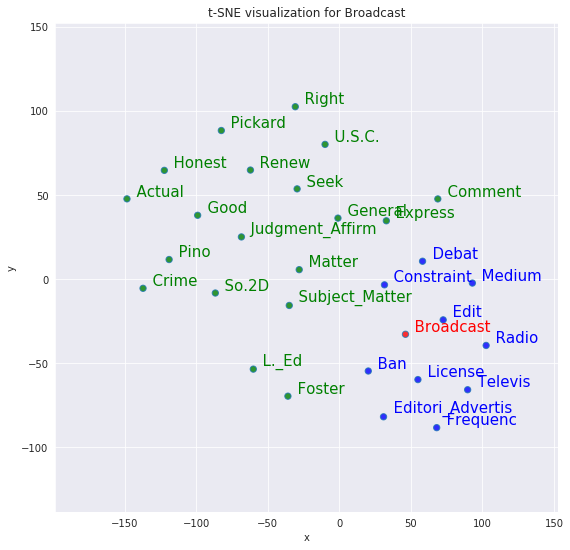

In [136]:
#### WINDOW SIZE  = 2


def sample_word(w2v, bigram_token):
    rnd_word = random.sample(random.sample(bigram_token, 1)[0], 1)[0]
    if rnd_word not in w2v.wv:
        return sample_word(w2v, bigram_token)
    w2v.wv.most_similar(positive=[rnd_word])
    return rnd_word

random_words = [sample_word(w2v_model, bigram_token) for _ in range(20)]


tsnescatterplot(w2v_model, random_words[0], random_words[1:])

In [58]:
#### WINDOW SIZE  = 16


cores = multiprocessing.cpu_count() # Count the number of cores in a computer
w2v_model_16 = Word2Vec(min_count=20,
                     window=16,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

w2v_model_16.build_vocab(bigram_token, progress_per=10000)
w2v_model_16.train(bigram_token, total_examples=w2v_model_16.corpus_count, epochs=30, report_delay=1)


(9725867, 21126450)

(30, 300)
(30, 10)


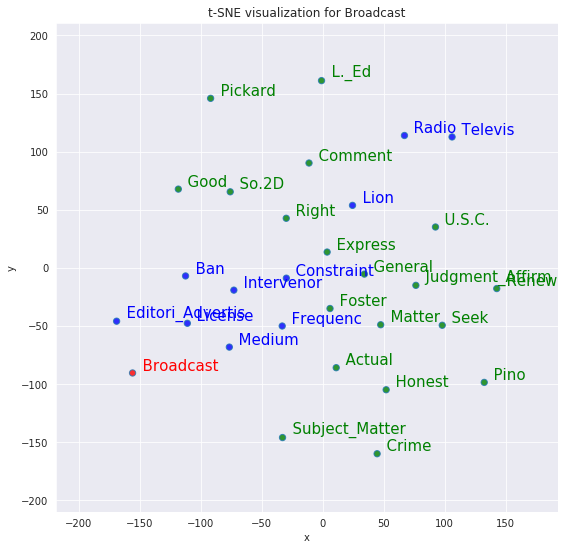

In [137]:
# do not resample word just use from above

tsnescatterplot(w2v_model_16, random_words[0], random_words[1:])

In [60]:
#### What do we see differene in window size? 
#### We can see that with 16 window size we have a definitly less difference 
#### between words because in a window size of 16 there are way more different possible words
#### then in a window size of 2. So we still see some of the same words in the nearest 10 (blue)
#### but we can directly see that everything moved a bit nearer together. and some words 
#### are even neaerer now then the 10 nearest from window size 2


In [78]:
# ################### 2. ######################## 
# Train separate word embeddings for Republican and Democrat judges. 
# Use your word embeddings to list the adjectives most associated with a social group or concept of your choice 
# (following, for example, the method in Caliskan et al 2017 or Kozlowski et al 2018), 
# and analyze differences by judge party.
def get_bigram(clean_docs):
    phrases = Phrases(clean_docs, min_count=30, progress_per=10000)
    bigram_phraser = Phraser(phrases)
    bigram_token = []
    for doc in clean_docs:
        bigram_token.append(bigram_phraser[doc])
    return bigram_token

In [79]:
### TRAIN W2Vec Democrat

w2v_democrat = Word2Vec(min_count=20,
                     window=4,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

democrat_bigram = get_bigram(doc_democrat_clean)
w2v_democrat.build_vocab(democrat_bigram, progress_per=10000)
w2v_democrat.train(democrat_bigram, total_examples=w2v_democrat.corpus_count, epochs=30, report_delay=1)


(5562204, 12565170)

In [80]:
### Train W2Vec Republican
w2v_republican = Word2Vec(min_count=20,
                     window=4,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

republican_bigram = get_bigram(doc_republican_clean)
w2v_republican.build_vocab(republican_bigram, progress_per=10000)
w2v_republican.train(republican_bigram, total_examples=w2v_republican.corpus_count, epochs=30, report_delay=1)


(3436329, 8789130)

(11, 300)
(11, 10)


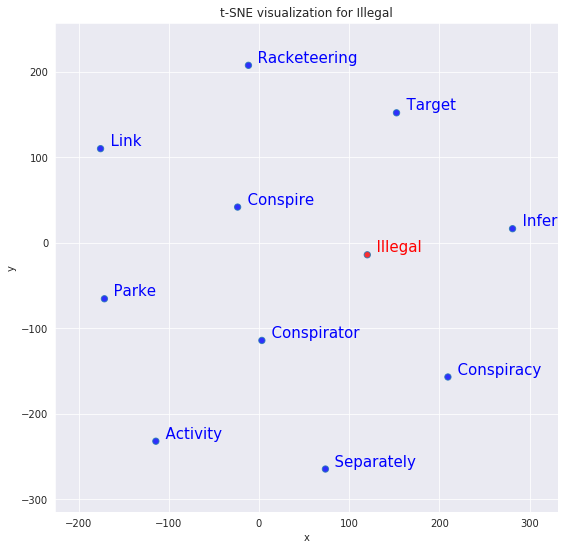

In [93]:
tsnescatterplot(w2v_republican, 'illegal', [])

(11, 300)
(11, 10)


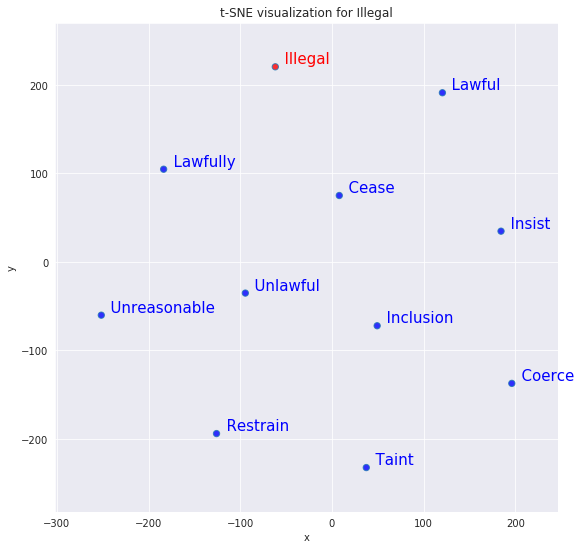

In [94]:
tsnescatterplot(w2v_democrat, 'illegal',[])

(11, 300)
(11, 10)


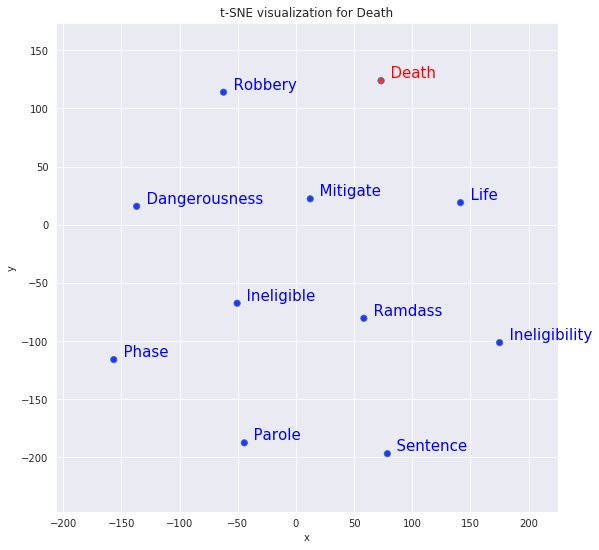

In [96]:
tsnescatterplot(w2v_republican, 'death', [])

(11, 300)
(11, 10)


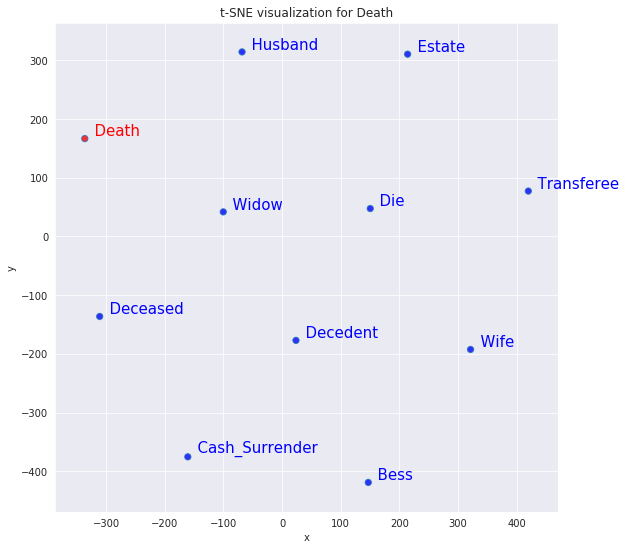

In [97]:
tsnescatterplot(w2v_democrat, 'death',[])

In [101]:
w2v_democrat.wv.most_similar(['death'])

[('decedent', 0.7392059564590454),
 ('die', 0.7087434530258179),
 ('husband', 0.7018104195594788),
 ('bess', 0.6999227404594421),
 ('widow', 0.6967538595199585),
 ('cash_surrender', 0.6794877052307129),
 ('transferee', 0.6575920581817627),
 ('estate', 0.589863657951355),
 ('wife', 0.5776979923248291),
 ('deceased', 0.5717678666114807)]

In [126]:
################## 3. #####################
###########################################
# Implement one of the causal inference methods from Lecture 12 (choose one of the following options):
# Look at the effect of political party on citations

X1 = []
y = []
for i in range(len(pd_all_cases)):
    xrep = pd_all_cases.iloc[i]['x_republican']
    log_cites = pd_all_cases.iloc[i]['log_cites']
    if not(np.isnan(xrep) or np.isnan(log_cites)):
        X1.append(xrep)
        y.append(log_cites)

X1 = np.array(X1).reshape(-1,1)
y = np.array(y)



In [127]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X1, y)

In [ ]:
# I did not understand how to apply the Double ML method here. 
# What feature I do have to use as T. 
